In [292]:
# Make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
# Import machine learning models and utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [294]:
def evaluation_workflow(df, random=42):
    
    # Make model
    regr = RandomForestRegressor(
        n_estimators=1000,
        max_depth=7,
        n_jobs=-1,
        random_state=42,
       )

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df["target"], test_size=0.2, random_state=random)
    

    # Fit model
    regr.fit(X_train, y_train)

    # Predict
    y_pred = regr.predict(X_test)

    # Evaluate
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

    return regr

    

In [295]:
# Read the data
df = pd.read_csv("sample_submission.csv")

In [296]:
# df.loc[:, df.columns[(((df.corr()**2)["target"]) < 0.0005)]] = 0# & (((df.corr()**2)["target"]) != 1)]

In [297]:
# df.to_csv("submission.csv", index=False)

In [298]:
# Remove Erroneous targets
# df["target"] = df["target"].apply(lambda x: x if x < 18 else np.nan)

<Axes: >

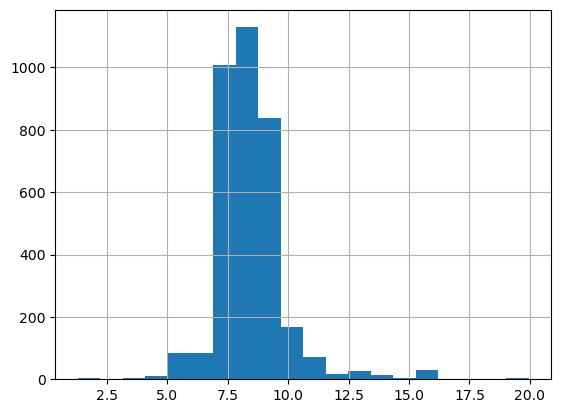

In [299]:
df[df.target.between(0, 20)].target.hist(bins=20)

In [300]:
# Removing values that are from (almost) impossible ranges
df.loc[:, df.columns.isin(["target"])] = df.loc[:, df.columns.isin(["target"])].apply(lambda x: x[(x > 7) & (x < 20)])
df.dropna(inplace=True)

In [301]:
# The correlation improved after removing weird values
df.loc[:, df.columns.str.contains("^O2") | (df.columns == "target")].corr()**2

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7
target,1.000000,0.154923,0.018504,0.003504,0.002517,0.000034,0.009532,0.007903
O2_1,0.154923,1.000000,0.024774,0.007081,0.000900,0.000215,0.003566,0.001148
O2_2,0.018504,0.024774,1.000000,0.000097,0.001083,0.000940,0.008420,0.001690
O2_3,0.003504,0.007081,0.000097,1.000000,0.057511,0.014619,0.034710,0.012155
O2_4,0.002517,0.000900,0.001083,0.057511,1.000000,0.021774,0.002166,0.000257
O2_5,0.000034,0.000215,0.000940,0.014619,0.021774,1.000000,0.000503,0.007965
O2_6,0.009532,0.003566,0.008420,0.034710,0.002166,0.000503,1.000000,0.035808
O2_7,0.007903,0.001148,0.001690,0.012155,0.000257,0.007965,0.035808,1.000000


<Axes: >

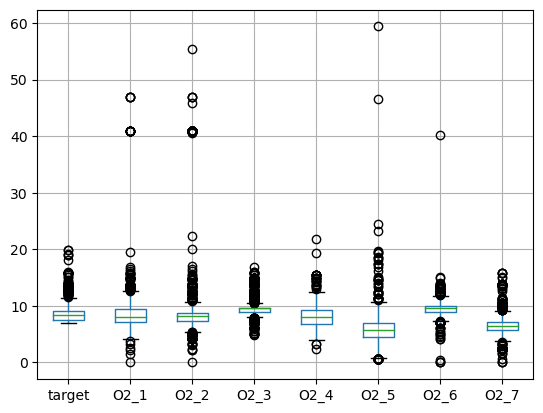

In [302]:
# Display the boxplot
df.loc[:, df.columns.str.contains("^O2") | (df.columns == "target")].boxplot()

<Axes: >

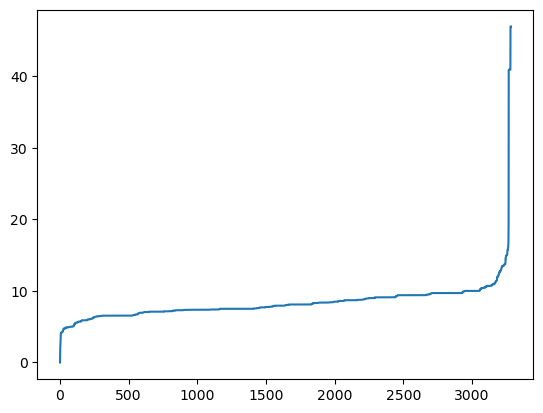

In [303]:
df["O2_1"].sort_values().reset_index(drop=True).plot()

In [304]:
# molecules = [#"^O2", "NH4", "NO2", "NO3", 
#              "BOD5"]


# # for molecule in molecules:
# #     print(molecule)
# #     df = df.copy()
# #     df.loc[:, df.columns.str.contains(molecule + "_3")] = df.loc[:, df.columns.str.contains(molecule)].mean(axis=1)
# #     # model = evaluation_workflow(df)
# #     # pd.DataFrame(model.feature_importances_, index=df.drop("target", axis=1).columns, columns=["Importance"]).sort_values(by="Importance", ascending=False).plot(kind="bar", figsize=(5, 5))


In [305]:
model = evaluation_workflow(df, random=None)

RMSE:  1.0631433051307888


<Axes: >

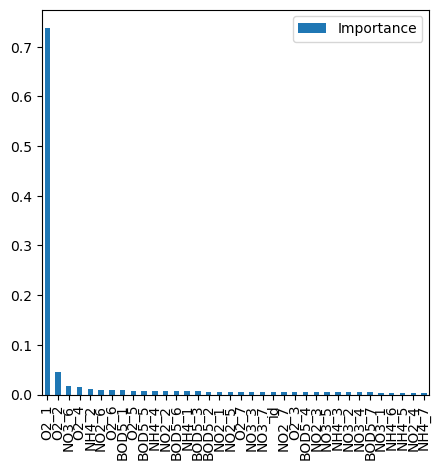

In [307]:
pd.DataFrame(model.feature_importances_, index=df.drop("target", axis=1).columns, columns=["Importance"]).sort_values(by="Importance", ascending=False).plot(kind="bar", figsize=(5, 5))

In [308]:
df["Anomaly"] = IsolationForest(contamination=0.02).fit_predict(df[["target","O2_2", "O2_3"]])

/home/lazydart/miniconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [243]:
df[df["O2_1"] > 20][["target", "O2_1", "O2_2"]]

,target,O2_1,O2_2
1,9.10,40.90,40.9
91,9.12,40.90,40.9
99,9.49,40.90,40.9
111,9.09,40.90,40.9
130,7.47,40.90,40.9
...,...,...,...
3386,7.26,40.90,40.9
3402,9.08,40.90,40.9
3407,8.51,40.90,40.9
3414,7.48,40.90,40.9


In [291]:
df.corr()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
id,1.000000,-0.008716,-0.003196,-0.013396,-0.011749,0.007309,-0.039680,-0.028260,-0.016148,0.006188,...,-0.008553,-0.006255,-0.023693,-0.009437,-0.010617,0.003463,0.005181,-0.000632,0.001433,-0.001762
target,-0.008716,1.000000,0.614053,0.456885,0.059197,-0.050169,0.005820,0.097634,0.088898,-0.005844,...,0.001914,-0.043430,-0.036281,-0.058017,0.023048,0.034932,0.040732,0.008103,0.010034,-0.001875
O2_1,-0.003196,0.614053,1.000000,0.474566,0.092845,0.041150,0.030616,0.062649,0.047947,0.053269,...,-0.009334,-0.010953,-0.005342,0.022248,0.002189,-0.012782,0.005872,0.003619,-0.012857,-0.000169
O2_2,-0.013396,0.456885,0.474566,1.000000,0.060414,-0.028571,-0.025560,0.108048,0.088757,-0.031388,...,-0.082202,-0.102837,-0.085570,-0.079980,0.035420,0.022433,0.046109,0.002308,0.028436,-0.025158
O2_3,-0.011749,0.059197,0.092845,0.060414,1.000000,0.239815,0.120911,0.186306,0.110251,0.051829,...,0.116728,0.069188,0.074026,0.056192,0.040007,-0.061909,-0.063939,0.003217,-0.032942,-0.017626
O2_4,0.007309,-0.050169,0.041150,-0.028571,0.239815,1.000000,0.147560,0.046537,0.016020,0.075467,...,0.143791,0.110895,0.115445,0.093784,-0.002273,-0.028881,-0.039097,-0.000717,-0.047752,0.009211
O2_5,-0.039680,0.005820,0.030616,-0.025560,0.120911,0.147560,1.000000,0.022423,0.089245,0.029453,...,0.198653,0.156831,0.122605,0.023458,-0.046128,-0.067166,-0.051297,-0.023138,-0.017516,0.009822
O2_6,-0.028260,0.097634,0.062649,0.108048,0.186306,0.046537,0.022423,1.000000,0.189230,-0.023712,...,0.007330,-0.031516,0.015610,-0.089066,-0.002978,-0.013553,-0.005947,-0.044924,0.025643,-0.019492
O2_7,-0.016148,0.088898,0.047947,0.088757,0.110251,0.016020,0.089245,0.189230,1.000000,0.009761,...,-0.017321,-0.072332,-0.025558,-0.125304,-0.039536,-0.101587,-0.045415,-0.027929,-0.001639,-0.040190
NH4_1,0.006188,-0.005844,0.053269,-0.031388,0.051829,0.075467,0.029453,-0.023712,0.009761,1.000000,...,0.061150,0.055714,0.089850,0.059620,0.016577,-0.065728,-0.064184,0.021198,-0.057980,-0.039101


<Axes: xlabel='O2_2', ylabel='O2_3'>

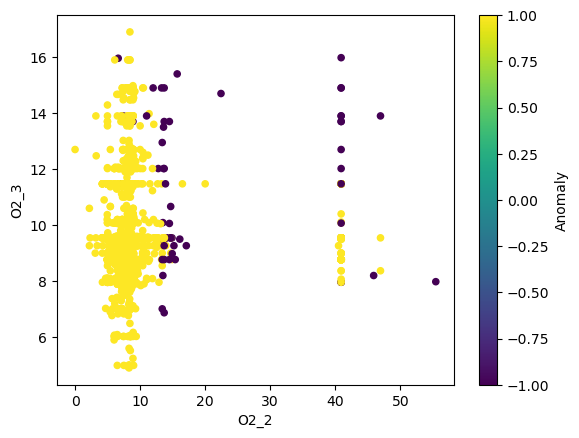

In [309]:
df[["O2_2", "O2_3", "Anomaly"]].plot.scatter(x="O2_2", y="O2_3", c="Anomaly", cmap="viridis")

In [278]:
df.loc[(df["O2_2"] > 30) & (df["O2_3"] < 30), "O2_2"] = df.loc[(df["O2_2"] > 30) & (df["O2_3"] < 30), "O2_3"] 

In [279]:
df.loc[(df["O2_1"] > 30) & (df["O2_2"] < 30), "O2_1"] = df.loc[(df["O2_1"] > 30) & (df["O2_2"] < 30), "O2_2"] 

In [280]:
df.loc[(df["O2_2"] > 30) & (df["O2_1"] < 30), "O2_2"] = df.loc[(df["O2_2"] > 30) & (df["O2_1"] < 30), "O2_1"] 

<Axes: >

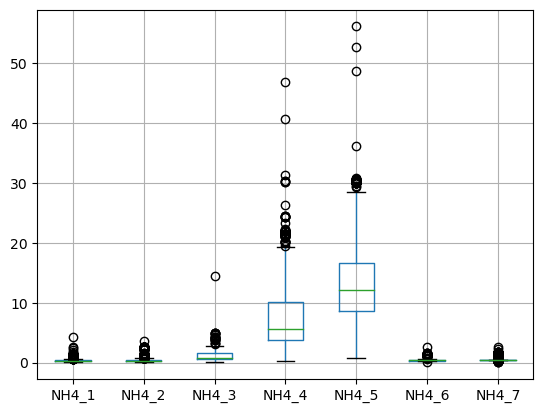

In [193]:
df.loc[:,df.columns.str.contains("NH4")].drop(2662).boxplot()

In [116]:
df.to_csv("submission.csv", index=False)